# Test Grid Biconical (v2)

Checking my Python script to generate the ASCII grids
for the MonteCarlo code.

In [8]:
%matplotlib inline

In [12]:
import grid_m82 as gm82

In [13]:
# Load param for biconical
reload(gm82)
param=gm82.init_param(ngrid=100)
param['flag_density'] = 1
param['flag_wind'] = 1
param['title'] = 'bicon_test'
param['rw_inner'] = 1.            #; Inner boundary of the wind (kpc)
param['rw_outer'] = 20.            #; Outer boundary of the wind (kpc)
param['box_size'] = param['rw_outer'] * 2
param['dl'] = param['box_size'] / param['ngrid']
param['n0'] =  0.1           # Density at inner radius (Hydrogen; cm^-3)
param['theta_min'] =  45.    # Opening angle of the cone (deg)
param['v_wind'] = 50.       # Parameterization of the wind speed (radial; km/s)
param['rg_outer'] = 0.2      # Outer boundary of galaxy (kpc)
param['density_pow'] = -2.

In [14]:
# Generate grid
# main call
reload(gm82)
out_arrays = gm82.main(param,out_root='tst_biconical')

Done making cells
Done with radius
Done with density
Done with velocity
Wrote: tst_biconical.fits
Wrote tst_biconical.asc


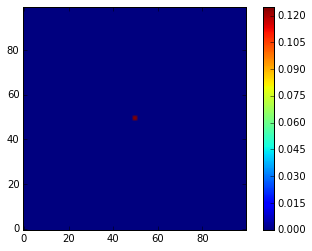

In [16]:
# Chk output
tst=True
if tst:
    rho_grid = out_arrays[0]
    emiss = out_arrays[4]
    plt.clf()
    #plt.imshow(np.log10(rho_grid[:,50,:]),origin='lower')
    plt.imshow(emiss[:,50,:],origin='lower')
    plt.colorbar()
    plt.show()

## Run
    cp bicon_param.lua param.lua
    make
    mpirun -np 8 a.out

## Generate Grid FITS file

In [2]:
import grid_utils as gridu

In [17]:
reload(gridu)
gridu.monte_to_fits('Test_Bicon/spec.dat', 'tst_bicon_monte.fits')

L_tot = 0.867488, nrm = 9.6
Wrote: tst_bicon_monte.fits


## View

In [18]:
# Read
grid_hdu = fits.open('tst_bicon_monte.fits')
data = grid_hdu[0].data
wave = grid_hdu[1].data

In [19]:
# Collapsed Image
image = np.sum(data,2)
# Spectrum
flux = np.sum(data,0)
flux = np.sum(flux,0)

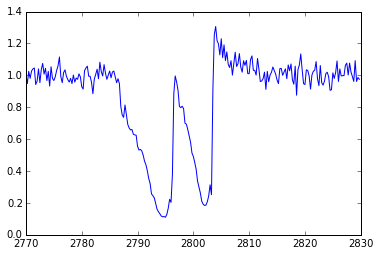

In [20]:
# Spectrum
xdb.xplot(wave,flux)

/Users/xavier/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


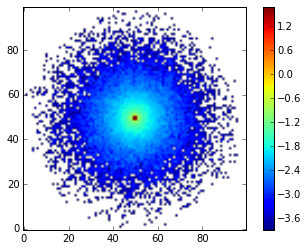

In [21]:
# Image
plt.clf()
plt.imshow(np.log10(image[:,:]), origin='lower')
#plt.imshow(data[:,:,109])
#plt.imshow(np.log10(data[:,:,109]),origin='lower')
plt.colorbar()
plt.show()

## Success!!